# In this file:

We identify the channels of interest, together with their date of interest.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import copy
import csv

from src.data.dataloader_functions import *
from src.utils.results_utils import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data:

In [52]:
# Load the original data for the index
original_data = load_processed_data(verbose = True)

Loading data in chunks of 1000: 100%|█████████▉| 18588/18604.825 [00:28<00:00, 642.13it/s]/Users/nicolas/Library/Python/3.9/lib/python/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Loading data in chunks of 1000: 100%|██████████| 18605/18604.825 [00:28<00:00, 652.65it/s]


Loaded 18604824 rows


Re-compute the rolling growth rate and store it to file

/!\ Note: Running the following cell is very time-consuming and requires around 16GB of memory. Run it only if you don't have the file `df_with_rgr.csv` in the `data` folder.

In [53]:
ROLLING_WINDOW = 20  # Set the rolling window for the growth rate, (5 months by default, could be changed in the future)

# Initialize an empty DataFrame to store the results
result = pd.DataFrame()

# Iterate over each group with a progress bar
for name, group in tqdm(original_data.groupby('channel'), desc="Processing channels"):
    group['rolling_growth_rate'] = group['delta_subs'].rolling(ROLLING_WINDOW, min_periods=ROLLING_WINDOW).mean()
    result = pd.concat([result, group])

result['growth_diff'] = result['delta_subs'] - result['rolling_growth_rate']

result.to_csv('data/df_with_rgr.tsv', sep='\t', index=True)

Processing channels:   1%|          | 782/133516 [00:07<19:57, 110.84it/s]


KeyboardInterrupt: 

Load the data with the rolling growth rate

In [54]:
# Load the data with rolling growth rate
df_with_rgr = pd.read_csv('Data/df_with_rgr.tsv', sep='\t')
df_with_rgr.head()

,category,views,delta_views,subs,delta_subs,videos,delta_videos,activity,view_count,like_count,dislike_count,rolling_growth_rate,growth_diff,is_bad_buzz
0,Travel & Events,62524.500,NaN,1466.000,NaN,29,NaN,1,5849.0,222.0,1.0,NaN,NaN,False
1,Travel & Events,67600.250,5075.750,1508.625,42.625,30,1.0,2,5336.0,204.0,1.0,42.625,0.000,False
2,Travel & Events,69982.000,2381.750,1530.750,22.125,31,1.0,2,5727.0,232.0,1.0,32.375,-10.250,True
3,Travel & Events,72663.125,2681.125,1558.625,27.875,32,1.0,2,19214.0,318.0,7.0,30.875,-3.000,True
4,Travel & Events,75093.000,2429.875,1591.000,32.375,33,1.0,2,6949.0,234.0,1.0,31.250,1.125,False


In [55]:
# Set the index to the original data
df_with_rgr.index = original_data.index
df_with_rgr.head()

category      views  delta_views  \
channel                  week                                            
UC--24Q3_ZQeFmgJE-Um5QZQ 82    Travel & Events  62524.500          NaN   
                         83    Travel & Events  67600.250     5075.750   
                         84    Travel & Events  69982.000     2381.750   
                         85    Travel & Events  72663.125     2681.125   
                         86    Travel & Events  75093.000     2429.875   

                                   subs  delta_subs  videos  delta_videos  \
channel                  week                                               
UC--24Q3_ZQeFmgJE-Um5QZQ 82    1466.000         NaN      29           NaN   
                         83    1508.625      42.625      30           1.0   
                         84    1530.750      22.125      31           1.0   
                         85    1558.625      27.875      32           1.0   
                         86    1591.000      32.375      33           1.0   

                               activity  view_count  like_count  \
channel                  week                                     
UC--24Q3_ZQeFmgJE-Um5QZQ 82           1      5849.0       222.0   
                         83           2      5336.0       204.0   
                         84           2      5727.0       232.0   
                         85           2     19214.0       318.0   
                         86           2      6949.0       234.0   

                               dislike_count  rolling_growth_rate  \
channel                  week                                       
UC--24Q3_ZQeFmgJE-Um5QZQ 82              1.0                  NaN   
                         83              1.0               42.625   
                         84              1.0               32.375   
                         85              7.0               30.875   
                         86              1.0               31.250   

                               growth_diff  is_bad_buzz  
channel                  week                            
UC--24Q3_ZQeFmgJE-Um5QZQ 82            NaN        False  
                         83          0.000        False  
                         84        -10.250         True  
                         85         -3.000         True  
                         86          1.125        False

In [56]:
# Drop the columns that we will re-compute using different parameters
df_with_rgr_new = df_with_rgr.drop(columns = ['is_bad_buzz'])
df_with_rgr_new.head()

category      views  delta_views  \
channel                  week                                            
UC--24Q3_ZQeFmgJE-Um5QZQ 82    Travel & Events  62524.500          NaN   
                         83    Travel & Events  67600.250     5075.750   
                         84    Travel & Events  69982.000     2381.750   
                         85    Travel & Events  72663.125     2681.125   
                         86    Travel & Events  75093.000     2429.875   

                                   subs  delta_subs  videos  delta_videos  \
channel                  week                                               
UC--24Q3_ZQeFmgJE-Um5QZQ 82    1466.000         NaN      29           NaN   
                         83    1508.625      42.625      30           1.0   
                         84    1530.750      22.125      31           1.0   
                         85    1558.625      27.875      32           1.0   
                         86    1591.000      32.375      33           1.0   

                               activity  view_count  like_count  \
channel                  week                                     
UC--24Q3_ZQeFmgJE-Um5QZQ 82           1      5849.0       222.0   
                         83           2      5336.0       204.0   
                         84           2      5727.0       232.0   
                         85           2     19214.0       318.0   
                         86           2      6949.0       234.0   

                               dislike_count  rolling_growth_rate  growth_diff  
channel                  week                                                   
UC--24Q3_ZQeFmgJE-Um5QZQ 82              1.0                  NaN          NaN  
                         83              1.0               42.625        0.000  
                         84              1.0               32.375      -10.250  
                         85              7.0               30.875       -3.000  
                         86              1.0               31.250        1.125

In [57]:
# Detection of period where growth_rate < rolling_growth_rate
df_with_rgr_new['decline_event_detected'] = df_with_rgr_new['growth_diff'] < 0

In [58]:
df_with_rgr_grouped = df_with_rgr_new.reset_index().groupby('channel')

print(f'Number of channels : {len(df_with_rgr_grouped.groups.keys())}')

Number of channels : 133516


In [59]:
df_with_rgr_grouped.get_group('UC-lHJZR3Gqxm24_Vd_AJ5Yw')

,channel,week,category,views,delta_views,subs,delta_subs,videos,delta_videos,activity,view_count,like_count,dislike_count,rolling_growth_rate,growth_diff,decline_event_detected
222663,UC-lHJZR3Gqxm24_Vd_AJ5Yw,93,Gaming,1.357761e+10,NaN,4.861796e+07,NaN,2906,NaN,14,45210757.0,1892943.0,51248.0,NaN,NaN,False
222664,UC-lHJZR3Gqxm24_Vd_AJ5Yw,94,Gaming,1.368959e+10,1.119836e+08,4.897182e+07,353856.680699,2919,13.0,15,40885232.0,2018614.0,35580.0,353856.680699,0.000000,False
222665,UC-lHJZR3Gqxm24_Vd_AJ5Yw,95,Gaming,1.373594e+10,4.635159e+07,4.909397e+07,122152.626592,2926,7.0,15,27707359.0,1390650.0,22598.0,238004.653646,-115852.027054,True
222666,UC-lHJZR3Gqxm24_Vd_AJ5Yw,96,Gaming,1.376195e+10,2.600902e+07,4.917638e+07,82404.010417,2932,6.0,14,25489724.0,1261334.0,38704.0,186137.772569,-103733.762153,True
222667,UC-lHJZR3Gqxm24_Vd_AJ5Yw,97,Gaming,1.378603e+10,2.407718e+07,4.925474e+07,78360.625000,2934,2.0,9,10034755.0,514876.0,19313.0,159193.485677,-80832.860677,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222810,UC-lHJZR3Gqxm24_Vd_AJ5Yw,243,Gaming,2.316604e+10,1.237398e+08,1.008078e+08,395694.250000,3909,7.0,16,47537894.0,3618933.0,42940.0,330238.087500,65456.162500,False
222811,UC-lHJZR3Gqxm24_Vd_AJ5Yw,244,Gaming,2.327098e+10,1.049338e+08,1.010909e+08,283079.500000,3914,5.0,14,99710511.0,7169424.0,138574.0,319666.000000,-36586.500000,True
222812,UC-lHJZR3Gqxm24_Vd_AJ5Yw,245,Gaming,2.337946e+10,1.084825e+08,1.010624e+08,-28475.875000,3921,7.0,14,61062493.0,3797080.0,43084.0,297805.656250,-326281.531250,True
222813,UC-lHJZR3Gqxm24_Vd_AJ5Yw,246,Gaming,2.347540e+10,9.593404e+07,1.010000e+08,-62395.875000,3928,7.0,16,50440884.0,3058171.0,39964.0,277660.200000,-340056.075000,True


In [65]:
# Create a map that contains for each entry: the id of the channel, and the starting week and end week of each decline event
decline_events = {}

# For loop to detect the starting and ending week of the decline event
for channel in tqdm(df_with_rgr_grouped.groups.keys(), desc="Processing channels"):
    channel_data = df_with_rgr_grouped.get_group(channel)
    
    # Identify indices where decline has started and ended
    for i in range(1, len(channel_data)):
        if channel_data['decline_event_detected'].iloc[i] and not channel_data['decline_event_detected'].iloc[i-1]:
            # Add the starting week of the decline event
            if channel not in decline_events:
                decline_events[channel] = []
            if channel == 'UC-lHJZR3Gqxm24_Vd_AJ5Yw':
                print(f'Channel {channel} has a decline event that starts.')
            decline_events[channel].append((channel_data['week'].iloc[i], None))
        if ((not channel_data['decline_event_detected'].iloc[i]) and channel_data['decline_event_detected'].iloc[i-1]):
            # Add the ending week of the decline event
            decline_events[channel][-1] = (decline_events[channel][-1][0], channel_data['week'].iloc[i])
            if channel == 'UC-lHJZR3Gqxm24_Vd_AJ5Yw':
                    print(f'Channel {channel} has a decline event that ends.')


Processing channels:   1%|▏         | 1718/133516 [00:03<03:52, 566.90it/s]

Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that starts.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that ends.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that starts.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that ends.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that starts.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that ends.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that starts.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that ends.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that starts.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that ends.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that starts.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that ends.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that starts.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that ends.
Channel UC-lHJZR3Gqxm24_Vd_AJ5Yw has a decline event that starts.
Channel UC-lHJZR3Gqxm24_

Processing channels: 100%|██████████| 133516/133516 [05:14<00:00, 424.52it/s]


In [66]:
print(decline_events['UC-lHJZR3Gqxm24_Vd_AJ5Yw'])

[(95, 99), (104, 111), (112, 127), (130, 131), (137, 146), (147, 151), (162, 179), (194, 197), (215, 218), (222, 241), (244, None)]


In [67]:
decline_events

{'UC--24Q3_ZQeFmgJE-Um5QZQ': [(84, 86),
  (87, 92),
  (93, 94),
  (95, 102),
  (105, 107),
  (108, 110),
  (114, 126),
  (127, 131),
  (135, 137),
  (148, 166),
  (168, 170),
  (174, 179),
  (184, 197),
  (199, 206),
  (209, 221),
  (223, 224),
  (229, None)],
 'UC--2EbuIuBOGgGqPiJxi3rg': [(80, 84),
  (85, 86),
  (88, 91),
  (108, 111),
  (112, 113),
  (140, 146),
  (147, 162),
  (163, 165),
  (168, 172),
  (173, 182),
  (185, 198),
  (200, 204),
  (205, 206),
  (209, 210),
  (219, 227),
  (230, 240),
  (242, 246),
  (247, None)],
 'UC--3c8RqSfAqYBdDjIG3UNA': [(218, 220), (229, 241), (245, None)],
 'UC--3ozenTzry39-xMqAPQlw': [(95, 106),
  (107, 114),
  (117, 118),
  (121, 146),
  (147, 148),
  (151, 154),
  (158, 166),
  (169, 186),
  (187, 192),
  (193, 195),
  (197, 198),
  (199, 200),
  (202, 203),
  (204, 207),
  (210, 228),
  (230, 236),
  (237, None)],
 'UC--6E6EpybocdaNlPhvK_9A': [(85, 86),
  (89, 94),
  (98, 109),
  (116, 120),
  (124, 126),
  (130, 146),
  (149, 159),
  (160,

In [71]:
# Remove only the events (tuples) with None as the second element
decline_events_no_None = {k: [x for x in v if x[1] is not None] for k, v in decline_events.items()}

In [72]:
decline_events_no_None

{'UC--24Q3_ZQeFmgJE-Um5QZQ': [(84, 86),
  (87, 92),
  (93, 94),
  (95, 102),
  (105, 107),
  (108, 110),
  (114, 126),
  (127, 131),
  (135, 137),
  (148, 166),
  (168, 170),
  (174, 179),
  (184, 197),
  (199, 206),
  (209, 221),
  (223, 224)],
 'UC--2EbuIuBOGgGqPiJxi3rg': [(80, 84),
  (85, 86),
  (88, 91),
  (108, 111),
  (112, 113),
  (140, 146),
  (147, 162),
  (163, 165),
  (168, 172),
  (173, 182),
  (185, 198),
  (200, 204),
  (205, 206),
  (209, 210),
  (219, 227),
  (230, 240),
  (242, 246)],
 'UC--3c8RqSfAqYBdDjIG3UNA': [(218, 220), (229, 241)],
 'UC--3ozenTzry39-xMqAPQlw': [(95, 106),
  (107, 114),
  (117, 118),
  (121, 146),
  (147, 148),
  (151, 154),
  (158, 166),
  (169, 186),
  (187, 192),
  (193, 195),
  (197, 198),
  (199, 200),
  (202, 203),
  (204, 207),
  (210, 228),
  (230, 236)],
 'UC--6E6EpybocdaNlPhvK_9A': [(85, 86),
  (89, 94),
  (98, 109),
  (116, 120),
  (124, 126),
  (130, 146),
  (149, 159),
  (160, 161),
  (166, 169),
  (173, 174),
  (181, 184),
  (186, 1

In [73]:
print(decline_events_no_None['UC-lHJZR3Gqxm24_Vd_AJ5Yw'])

[(95, 99), (104, 111), (112, 127), (130, 131), (137, 146), (147, 151), (162, 179), (194, 197), (215, 218), (222, 241)]


In [74]:
# Add the duration of the decline event for each decline event for each channel (created from a deep copy of the original decline events)
decline_events_with_duration = copy.deepcopy(decline_events_no_None)

for channel in decline_events_with_duration:
    for i in range(len(decline_events_with_duration[channel])):
        decline_events_with_duration[channel][i] = ((decline_events_with_duration[channel][i][0], decline_events_with_duration[channel][i][1]), decline_events_with_duration[channel][i][1] - decline_events_with_duration[channel][i][0])

In [75]:
decline_events_with_duration

{'UC--24Q3_ZQeFmgJE-Um5QZQ': [((84, 86), 2),
  ((87, 92), 5),
  ((93, 94), 1),
  ((95, 102), 7),
  ((105, 107), 2),
  ((108, 110), 2),
  ((114, 126), 12),
  ((127, 131), 4),
  ((135, 137), 2),
  ((148, 166), 18),
  ((168, 170), 2),
  ((174, 179), 5),
  ((184, 197), 13),
  ((199, 206), 7),
  ((209, 221), 12),
  ((223, 224), 1)],
 'UC--2EbuIuBOGgGqPiJxi3rg': [((80, 84), 4),
  ((85, 86), 1),
  ((88, 91), 3),
  ((108, 111), 3),
  ((112, 113), 1),
  ((140, 146), 6),
  ((147, 162), 15),
  ((163, 165), 2),
  ((168, 172), 4),
  ((173, 182), 9),
  ((185, 198), 13),
  ((200, 204), 4),
  ((205, 206), 1),
  ((209, 210), 1),
  ((219, 227), 8),
  ((230, 240), 10),
  ((242, 246), 4)],
 'UC--3c8RqSfAqYBdDjIG3UNA': [((218, 220), 2), ((229, 241), 12)],
 'UC--3ozenTzry39-xMqAPQlw': [((95, 106), 11),
  ((107, 114), 7),
  ((117, 118), 1),
  ((121, 146), 25),
  ((147, 148), 1),
  ((151, 154), 3),
  ((158, 166), 8),
  ((169, 186), 17),
  ((187, 192), 5),
  ((193, 195), 2),
  ((197, 198), 1),
  ((199, 200), 1

Mean duration of decline events: 5.95126485777721
Median duration of decline events: 3.0
Min duration of decline events: 1
Max duration of decline events: 104


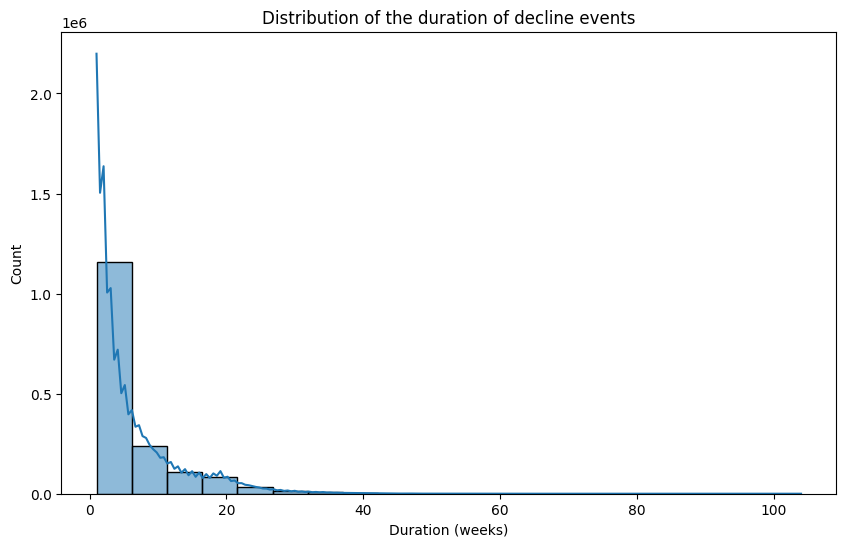

In [76]:
# Analyse the duration of the decline events (mean, median, min, max, plot)
duration_list = []
for channel in decline_events_with_duration:
    for event in decline_events_with_duration[channel]:
        duration_list.append(event[1])

duration_list = np.array(duration_list)

print(f'Mean duration of decline events: {np.mean(duration_list)}')
print(f'Median duration of decline events: {np.median(duration_list)}')
print(f'Min duration of decline events: {np.min(duration_list)}')
print(f'Max duration of decline events: {np.max(duration_list)}')

plt.figure(figsize=(10, 6))
sns.histplot(duration_list, bins=20, kde=True)
plt.title('Distribution of the duration of decline events')
plt.xlabel('Duration (weeks)')
plt.ylabel('Count')
plt.show()

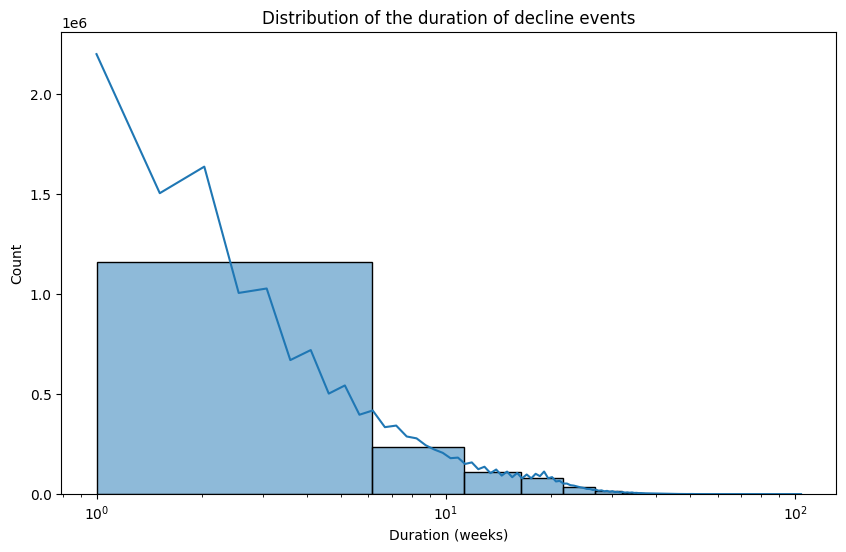

In [77]:
# Same plot with log scale to un-scew the distribution
plt.figure(figsize=(10, 6))
sns.histplot(duration_list, bins=20, kde=True)
plt.title('Distribution of the duration of decline events')
plt.xlabel('Duration (weeks)')
plt.ylabel('Count')
plt.xscale('log')
plt.show()

In [78]:
# Filter out the decline events that are shorter than the minimum duration

DECLINE_MIN_DURATION = 8 # Set the minimum duration of a detected decline event to be considered as an effective decline event
de_filtered_on_duration = {k: [x for x in v if x[1] >= DECLINE_MIN_DURATION] for k, v in decline_events_with_duration.items()}

In [79]:
de_filtered_on_duration

{'UC--24Q3_ZQeFmgJE-Um5QZQ': [((114, 126), 12),
  ((148, 166), 18),
  ((184, 197), 13),
  ((209, 221), 12)],
 'UC--2EbuIuBOGgGqPiJxi3rg': [((147, 162), 15),
  ((173, 182), 9),
  ((185, 198), 13),
  ((219, 227), 8),
  ((230, 240), 10)],
 'UC--3c8RqSfAqYBdDjIG3UNA': [((229, 241), 12)],
 'UC--3ozenTzry39-xMqAPQlw': [((95, 106), 11),
  ((121, 146), 25),
  ((158, 166), 8),
  ((169, 186), 17),
  ((210, 228), 18)],
 'UC--6E6EpybocdaNlPhvK_9A': [((98, 109), 11),
  ((130, 146), 16),
  ((149, 159), 10),
  ((206, 216), 10),
  ((221, 235), 14)],
 'UC--70ql_IxJmhmqXqrkJrWQ': [((107, 121), 14),
  ((129, 144), 15),
  ((147, 156), 9),
  ((189, 198), 9),
  ((218, 227), 9)],
 'UC--7oyGW0N7fMf164-ZXljQ': [((221, 233), 12)],
 'UC--94OGFAzYDOJb0eXgMjew': [((149, 171), 22), ((208, 222), 14)],
 'UC--BMyA2X4a9PGAo3lTuopg': [((109, 122), 13),
  ((138, 146), 8),
  ((159, 180), 21),
  ((182, 198), 16),
  ((212, 228), 16),
  ((230, 239), 9)],
 'UC--EwQJeJ6SKlJdswehQH4g': [((113, 132), 19),
  ((141, 158), 17),
  (

Mean duration of decline events: 14.976273023764357
Median duration of decline events: 13.0
Min duration of decline events: 8
Max duration of decline events: 104


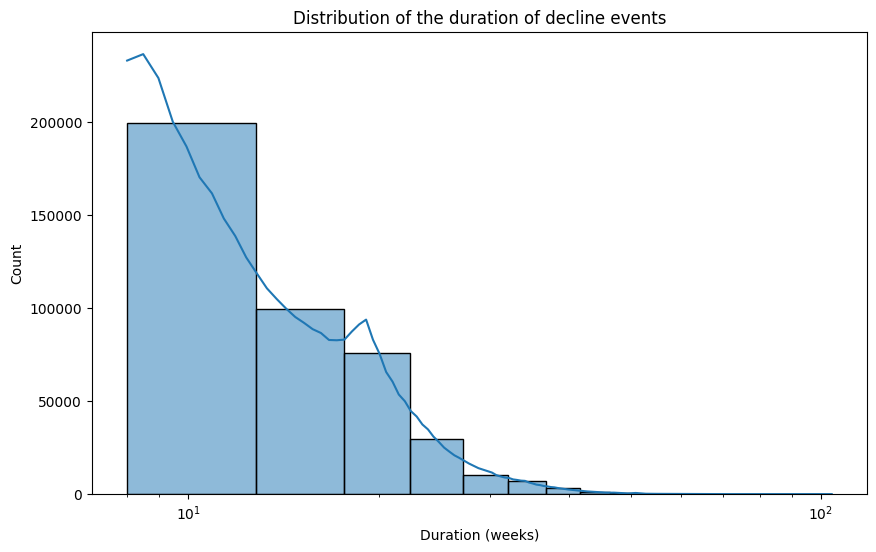

In [80]:
# Analyse the duration of the decline events (mean, median, min, max, plot) after filtering out the decline events that are shorter than the minimum duration
duration_list_filtered = []
for channel in de_filtered_on_duration:
    for event in de_filtered_on_duration[channel]:
        duration_list_filtered.append(event[1])

duration_list_filtered = np.array(duration_list_filtered)

print(f'Mean duration of decline events: {np.mean(duration_list_filtered)}')
print(f'Median duration of decline events: {np.median(duration_list_filtered)}')
print(f'Min duration of decline events: {np.min(duration_list_filtered)}')
print(f'Max duration of decline events: {np.max(duration_list_filtered)}')

plt.figure(figsize=(10, 6))
sns.histplot(duration_list_filtered, bins=20, kde=True)
plt.title('Distribution of the duration of decline events')
plt.xlabel('Duration (weeks)')
plt.ylabel('Count')
plt.xscale('log')
plt.show()

In [81]:
# Compute the growth diff percentage
df_with_rgr_final = df_with_rgr_new
df_with_rgr_final['growth_diff_percentage'] = (df_with_rgr_final['growth_diff'] / df_with_rgr_final['rolling_growth_rate']) * 100
df_with_rgr_final.head()

category      views  delta_views  \
channel                  week                                            
UC--24Q3_ZQeFmgJE-Um5QZQ 82    Travel & Events  62524.500          NaN   
                         83    Travel & Events  67600.250     5075.750   
                         84    Travel & Events  69982.000     2381.750   
                         85    Travel & Events  72663.125     2681.125   
                         86    Travel & Events  75093.000     2429.875   

                                   subs  delta_subs  videos  delta_videos  \
channel                  week                                               
UC--24Q3_ZQeFmgJE-Um5QZQ 82    1466.000         NaN      29           NaN   
                         83    1508.625      42.625      30           1.0   
                         84    1530.750      22.125      31           1.0   
                         85    1558.625      27.875      32           1.0   
                         86    1591.000      32.375      33           1.0   

                               activity  view_count  like_count  \
channel                  week                                     
UC--24Q3_ZQeFmgJE-Um5QZQ 82           1      5849.0       222.0   
                         83           2      5336.0       204.0   
                         84           2      5727.0       232.0   
                         85           2     19214.0       318.0   
                         86           2      6949.0       234.0   

                               dislike_count  rolling_growth_rate  \
channel                  week                                       
UC--24Q3_ZQeFmgJE-Um5QZQ 82              1.0                  NaN   
                         83              1.0               42.625   
                         84              1.0               32.375   
                         85              7.0               30.875   
                         86              1.0               31.250   

                               growth_diff  decline_event_detected  \
channel                  week                                        
UC--24Q3_ZQeFmgJE-Um5QZQ 82            NaN                   False   
                         83          0.000                   False   
                         84        -10.250                    True   
                         85         -3.000                    True   
                         86          1.125                   False   

                               growth_diff_percentage  
channel                  week                          
UC--24Q3_ZQeFmgJE-Um5QZQ 82                       NaN  
                         83                  0.000000  
                         84                -31.660232  
                         85                 -9.716599  
                         86                  3.600000

In [84]:
df_with_rgr_grouped_final = df_with_rgr_final.reset_index().groupby('channel')

In [85]:
# From the decline events filtered out because of a too short duration, we check if the event should still be included in the list of decline events, 
# because it is too intense (i.e. the minimum growth difference is below a certain threshold)

DECLINE_MIN_GROWTH_DIFF_PERCENTAGE = - 20 # Set the minimum magnitude of the growth difference to be considered as an effective decline event

# For each channel, for each event:
# We keep the event only if the miimum growth difference during the period starting from the first week of the event to the last week of the event is less than the threshold
de_filtered_on_growth_diff = {}

for channel in tqdm(df_with_rgr_grouped_final.groups.keys(), desc="Processing channels"):
    channel_data = df_with_rgr_grouped_final.get_group(channel)
    for event in decline_events_with_duration.get(channel, []):
        start_week = event[0][0]
        end_week = event[0][1]
        min_growth_diff = channel_data.loc[(channel_data['week'] >= start_week) & (channel_data['week'] <= end_week)]['growth_diff'].min()
        if min_growth_diff < DECLINE_MIN_GROWTH_DIFF_PERCENTAGE:
            if channel not in de_filtered_on_growth_diff:
                de_filtered_on_growth_diff[channel] = []
            de_filtered_on_growth_diff[channel].append(event)

Processing channels: 100%|██████████| 133516/133516 [06:19<00:00, 352.02it/s]


In [94]:
de_filtered_on_growth_diff

{'UC--24Q3_ZQeFmgJE-Um5QZQ': [((114, 126), 12),
  ((148, 166), 18),
  ((174, 179), 5),
  ((184, 197), 13),
  ((199, 206), 7),
  ((209, 221), 12)],
 'UC--2EbuIuBOGgGqPiJxi3rg': [((140, 146), 6),
  ((147, 162), 15),
  ((185, 198), 13),
  ((242, 246), 4)],
 'UC--3c8RqSfAqYBdDjIG3UNA': [((218, 220), 2), ((229, 241), 12)],
 'UC--3ozenTzry39-xMqAPQlw': [((95, 106), 11),
  ((107, 114), 7),
  ((117, 118), 1),
  ((121, 146), 25),
  ((147, 148), 1),
  ((151, 154), 3),
  ((158, 166), 8),
  ((169, 186), 17),
  ((187, 192), 5),
  ((204, 207), 3),
  ((210, 228), 18),
  ((230, 236), 6)],
 'UC--6E6EpybocdaNlPhvK_9A': [((89, 94), 5),
  ((98, 109), 11),
  ((116, 120), 4),
  ((124, 126), 2),
  ((130, 146), 16),
  ((149, 159), 10),
  ((181, 184), 3),
  ((189, 195), 6),
  ((199, 205), 6),
  ((206, 216), 10),
  ((221, 235), 14)],
 'UC--70ql_IxJmhmqXqrkJrWQ': [((102, 103), 1),
  ((107, 121), 14),
  ((123, 127), 4),
  ((129, 144), 15),
  ((147, 156), 9),
  ((157, 161), 4),
  ((175, 179), 4),
  ((181, 187), 6)

In [119]:
# From the decline events filtered on growth difference, we remove the events that are shorter than 2 weeks to avoid outliers

ANTI_OUTLIERS_MIN_DURATION = 5
de_filtered_on_growth_diff_no_outliers = {k: [x for x in v if x[1] >= ANTI_OUTLIERS_MIN_DURATION and x[1] < DECLINE_MIN_DURATION] for k, v in de_filtered_on_growth_diff.items()}

In [120]:
de_filtered_on_growth_diff_no_outliers

{'UC--24Q3_ZQeFmgJE-Um5QZQ': [((174, 179), 5), ((199, 206), 7)],
 'UC--2EbuIuBOGgGqPiJxi3rg': [((140, 146), 6)],
 'UC--3c8RqSfAqYBdDjIG3UNA': [],
 'UC--3ozenTzry39-xMqAPQlw': [((107, 114), 7),
  ((187, 192), 5),
  ((230, 236), 6)],
 'UC--6E6EpybocdaNlPhvK_9A': [((89, 94), 5), ((189, 195), 6), ((199, 205), 6)],
 'UC--70ql_IxJmhmqXqrkJrWQ': [((181, 187), 6)],
 'UC--7oyGW0N7fMf164-ZXljQ': [],
 'UC--94OGFAzYDOJb0eXgMjew': [((172, 177), 5),
  ((179, 186), 7),
  ((187, 193), 6)],
 'UC--BMyA2X4a9PGAo3lTuopg': [],
 'UC--EwQJeJ6SKlJdswehQH4g': [((102, 109), 7), ((189, 196), 7)],
 'UC--HPaiKtsr5Ox2Bd7vJMKA': [((199, 206), 7)],
 'UC--LAVm36WiCmqQbekV17qQ': [((102, 109), 7),
  ((112, 119), 7),
  ((133, 138), 5),
  ((149, 154), 5)],
 'UC--MxpGXJ3LVD8KvlNzRlcA': [],
 'UC--QN7syH6Tj_9jVWhLshzQ': [],
 'UC--SaadDxRXz729rtbQqyBA': [((82, 89), 7),
  ((105, 110), 5),
  ((182, 188), 6),
  ((192, 197), 5),
  ((200, 206), 6)],
 'UC--TqCe_AxlW6MNGHwBWhng': [((190, 196), 6)],
 'UC--WESWtg3ttfb06iXfcmIA': [((16

In [121]:
# Merge the decline events filtered on duration (de_filtered_on_duration) and growth difference (de_filtered_on_growth_diff_no_outliers) in one dictionary
decline_events_final = {k: de_filtered_on_duration.get(k, []) + de_filtered_on_growth_diff_no_outliers.get(k, []) for k in set(de_filtered_on_duration) | set(de_filtered_on_growth_diff_no_outliers)}
decline_events_final

df_with_rgr_new.loc[('UC-lHJZR3Gqxm24_Vd_AJ5Yw', 95)]

category                              Gaming
views                     13735941803.151039
delta_views                   46351585.20285
subs                         49093973.932292
delta_subs                     122152.626592
videos                                  2926
delta_videos                             7.0
activity                                  15
view_count                        27707359.0
like_count                         1390650.0
dislike_count                        22598.0
rolling_growth_rate            238004.653646
growth_diff                   -115852.027054
decline_event_detected                  True
growth_diff_percentage            -48.676371
Name: (UC-lHJZR3Gqxm24_Vd_AJ5Yw, 95), dtype: object

In [122]:
# Sort the decline events by starting week
decline_events_final_sorted = {k: sorted(v, key=lambda x: x[0][0]) for k, v in decline_events_final.items()}
decline_events_final_sorted

{'UCSXnAtb3ixz3EZ6nBcWUEmg': [((106, 114), 8),
  ((121, 127), 6),
  ((139, 150), 11),
  ((157, 162), 5),
  ((190, 196), 6),
  ((199, 205), 6),
  ((216, 221), 5),
  ((228, 234), 6)],
 'UCO46mZ07U0sP8QKJafyxa2w': [((186, 196), 10),
  ((218, 224), 6),
  ((226, 233), 7),
  ((240, 245), 5)],
 'UCICfT2-ty42xfRk0zKPu_sA': [((83, 102), 19),
  ((104, 112), 8),
  ((122, 132), 10),
  ((157, 163), 6),
  ((188, 198), 10),
  ((203, 211), 8)],
 'UCi-5895_IIqVJIJZr5GeGgA': [((88, 94), 6),
  ((112, 122), 10),
  ((125, 132), 7),
  ((140, 145), 5),
  ((165, 178), 13),
  ((205, 212), 7),
  ((213, 221), 8),
  ((224, 236), 12)],
 'UCIaIVpEocfuQ9fhBT1rsKrQ': [((97, 105), 8),
  ((147, 155), 8),
  ((162, 181), 19),
  ((182, 188), 6),
  ((210, 237), 27)],
 'UC1PcleKB2id1hsIIABvxUJg': [((114, 129), 15),
  ((131, 138), 7),
  ((140, 145), 5),
  ((160, 178), 18),
  ((180, 185), 5),
  ((193, 198), 5),
  ((202, 207), 5),
  ((208, 222), 14),
  ((237, 243), 6)],
 'UCMmU0XaR0coor7dtJkEAh4A': [((95, 103), 8),
  ((122, 13

In [123]:
print(f'Number of channels with decline events detected: {len(decline_events_final_sorted)}')
print(f'Number of decline events detected: {sum([len(v) for v in decline_events_final_sorted.values()])}')

Number of channels with decline events detected: 133305
Number of decline events detected: 603387


In [124]:
# Check the number of decline events detected for a specific channel
channel = 'UC-lHJZR3Gqxm24_Vd_AJ5Yw'
if channel in decline_events_final_sorted:
    nb_events = len(decline_events_final_sorted.get(channel))
else:
    nb_events = 0
print(f'Number of decline events detected for channel {channel}: {nb_events}')

Number of decline events detected for channel UC-lHJZR3Gqxm24_Vd_AJ5Yw: 5


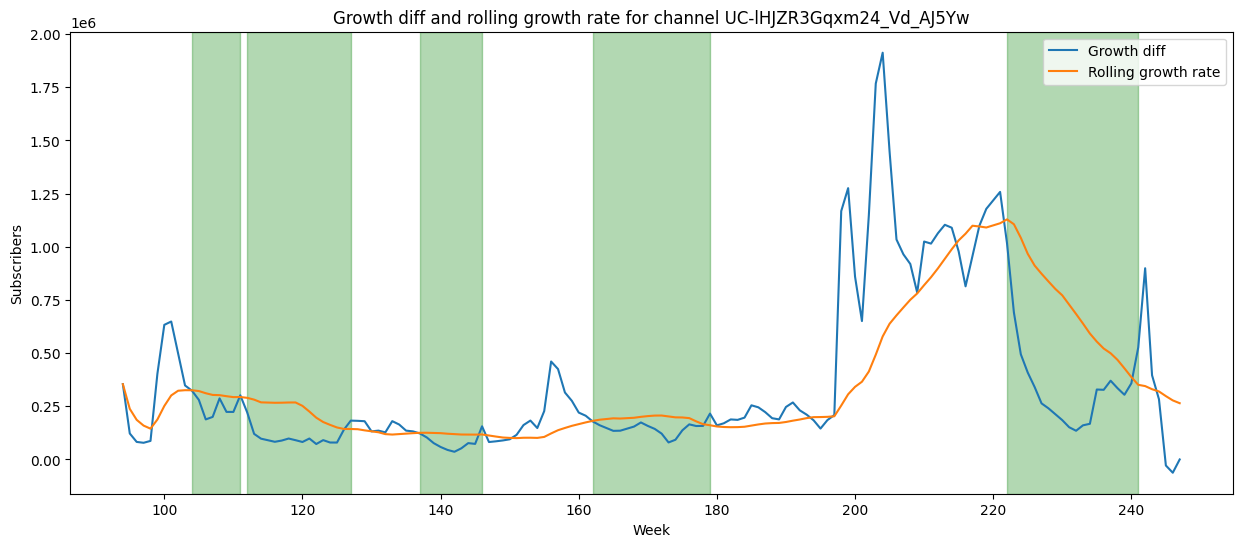

In [125]:
# For one channel, plot the growth difference and the rolling growth rate, and highlight the decline events from decline_events_final_sorted

channel = 'UC-lHJZR3Gqxm24_Vd_AJ5Yw'
channel_data = df_with_rgr_grouped_final.get_group(channel)

plt.figure(figsize=(15, 6))
plt.plot(channel_data['week'], channel_data['delta_subs'], label='Growth diff')
plt.plot(channel_data['week'], channel_data['rolling_growth_rate'], label='Rolling growth rate')
plt.title(f'Growth diff and rolling growth rate for channel {channel}')
plt.xlabel('Week')
plt.ylabel('Subscribers')
plt.legend()

for event in decline_events_final_sorted.get(channel, []):
    plt.axvspan(event[0][0], event[0][1], color='green', alpha=0.3)
    
plt.show()

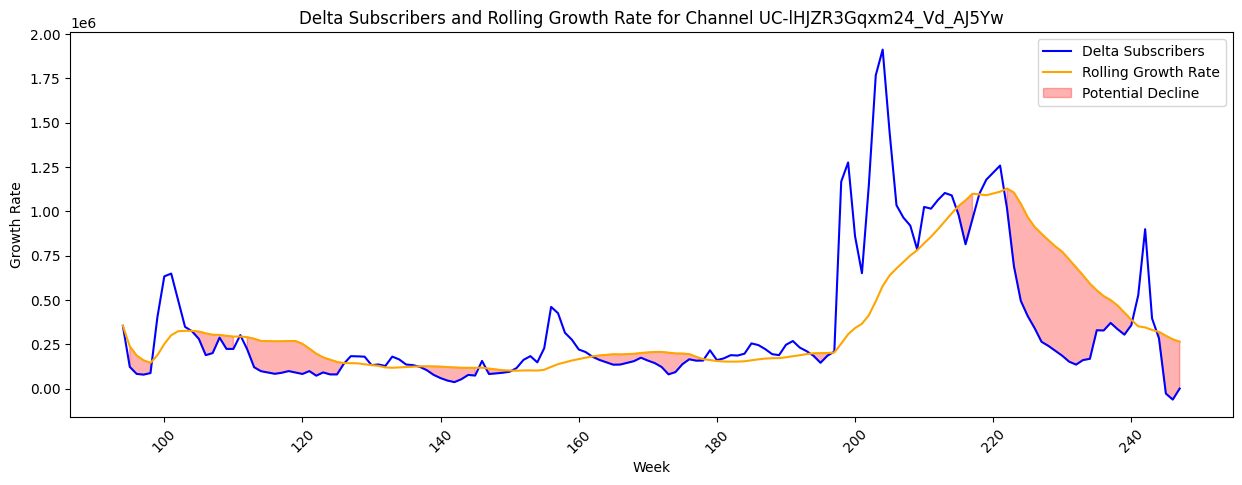

In [117]:
plot_rolling_growth_rate2('UC-lHJZR3Gqxm24_Vd_AJ5Yw', df_with_rgr_final)

In [126]:
# Write to CSV file
with open('decline_events2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(["Channel", "Event", "Duration"])
    
    # Write rows
    for channel, events in decline_events_final_sorted.items():
        for event, end_week in events:
            writer.writerow([channel, event, end_week])